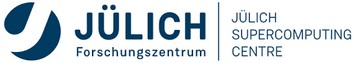
Author: [Jens Henrik Göbbert](mailto:j.goebbert@fz-juelich.de)
------------------------------------

# Supercomputing with JupyterLab - Tips & Tricks

This is the first time you are using JupyterLab on an HPC system? Let us show you some tips & tricks.

This notebook might be special to the environment at Juelich Supercomputing Centre, Forschungszentrum Juelich, Germany.

-------------------------

#### Exercise 0:
Are you really running on a compute node?

In [1]:
!hostname

jrc0437


#### Exercise 1:
Explore the directory $JUPYTER_LOG_DIR

In [2]:
!echo $JUPYTER_LOG_DIR

/p/scratch/training2211/unicore-jobs/16657dd3-7c9f-415d-bbfb-18618d9bcde0


In [3]:
!ls -lat $JUPYTER_LOG_DIR

total 16437
-rw-r--r--  1 goebbert1 training2211 254776 Apr  5 18:04 stderr
-rw-r--r--  1 goebbert1 training2211    287 Apr  5 18:01 stdout
drwx--S---  2 goebbert1 training2211  16384 Apr  5 17:56 .
-rw-------  1 goebbert1 training2211    496 Apr  5 17:56 .validate_token.sh
-rw-------  1 goebbert1 training2211   2433 Apr  5 17:56 .config.py
-rwxrwxr--  1 goebbert1 training2211    566 Apr  5 17:56 bss_submit_1649174192461
-rwxrwxr--  1 goebbert1 training2211   2935 Apr  5 17:56 UNICORE_Job_1649174192461
-rw-------  1 goebbert1 training2211     28 Apr  5 17:56 .pre_start.sh
-rw-------  1 goebbert1 training2211   9993 Apr  5 17:56 .start.sh
-rw-------  1 goebbert1 training2211     32 Apr  5 17:56 .jupyter.token
drwxrwsr-x 16 schuller1 training2211   4096 Apr  5 17:56 ..


#### Exercise 2:
Explore `$JUPYTER_LOG_DIR/.start` file

In [4]:
!cat $JUPYTER_LOG_DIR/.start.sh

#!/bin/bash
_term() {
  echo "Caught SIGTERM signal!"
  kill -TERM "$child" 2>/dev/null
}
trap _term SIGTERM

# Get token via file, so it's not exposed in the process arguments
export JUPYTERHUB_API_TOKEN=$(cat .jupyter.token)
export JPY_API_TOKEN=$(cat .jupyter.token)

# Switch to jupyter-server
export JUPYTERHUB_SINGLEUSER_APP="jupyter_server.serverapp.ServerApp"

# Log debug information
echo $SYSTEMNAME

# Get current directory
DIR="$( cd "$( dirname "${BASH_SOURCE[0]}" )" >/dev/null 2>&1 && pwd )"
# Set default root directory for JupyterLab
export JUPYTER_JSC_HOME=${HOME}
# Python package black needs this directory
if [[ ! -d ${HOME}/.cache/black/19.3b0 ]]; then
    mkdir -p ${HOME}/.cache/black/19.3b0
fi

echo "Running on $HOSTNAME"
# Get hostname to send information to JupyterHub.
HOSTNAMES=$(hostname -s)
if [[ $HOSTNAMES == "jrlogin"* ]]; then
    HOSTNAMEI=${HOSTNAME}
else
    HOSTNAMEI=${HOSTNAMES}i
fi

# JupyterHub will create a ssh tunnel between JupyterHub and this node to 

##### Exporting special variables
`export JUPYTERHUB_API_TOKEN=$(cat .jupyter.token)`  
`export JUPYTER_JSC_HOME=${HOME}`  

##### Reporting startup progress
`curl -X "POST" -H "Authorization: token ${JUPYTERHUB_API_TOKEN}"` -> `progress: 0%..100%


##### Load Jupyter modules
```bash
if [[ -f ${HOME}/.jupyter/start_jupyter-jsc.sh ]]; then
    source ${HOME}/.jupyter/start_jupyter-jsc.sh
else
    module purge
    module use $OTHERSTAGES
    module load Stages/2020
    module load GCCcore/.10.3.0
    module load JupyterCollection/2021.3.2
fi
```

##### Start Jupyter

```bash
if [[ -n $JUPYTERJSC_USER_CMD ]]; then
    timeout 30d $JUPYTERJSC_USER_CMD &
else
    timeout 30d jupyterhub-singleuser --debug --config ${DIR}/.config.py &
fi
```

#### Exercise 3:
Explore `$JUPYTER_LOG_DIR/stderr`

In [5]:
!cat $JUPYTER_LOG_DIR/stderr

The following modules were not unloaded:
  (Use "module --force purge" to unload all):

  1) Stages/2022

Due to MODULEPATH changes, the following have been reloaded:
  1) Stages/2022


  Preparing the environment for use of requested stage ( 2020 ).


The following have been reloaded with a version change:
  1) Stages/2022 => Stages/2020

[D 2022-04-05 17:56:56.130 SingleUserNotebookApp application:174] Searching ['/p/home/jusers/goebbert1/jureca', '/p/home/jusers/goebbert1/jureca/.jupyter', '/p/software/jurecadc/stages/2020/software/Jupyter/2021.3.2-gcccoremkl-10.3.0-2021.2.0-Python-3.8.5/etc/jupyter', '/p/home/jusers/goebbert1/jureca/.jupyter', '/p/software/jurecadc/stages/2020/software/Python/3.8.5-GCCcore-10.3.0/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter'] for config files
[D 2022-04-05 17:56:56.131 SingleUserNotebookApp application:731] Looking for jupyter_config in /etc/jupyter
[D 2022-04-05 17:56:56.131 SingleUserNotebookApp application:731] Looking for jupyter_confi

#### Exercise 4:
How to access `$PROJECT`, `$SCRATCH` etc. from within JupyterLab.

In JupyterLab's filebrowser you cannot escape to parent dirs of the current working directory of the juypter process.  
**Solution:**
Add softlinks in your $HOME to project-, scratch-directories.

In [11]:
!ln -s $PROJECT $HOME/PROJECT_$(basename $PROJECT)

In [12]:
!ln -s $SCRATCH $HOME/SCRATCH_$(basename $SCRATCH)